In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_excel("bases/bases_limpas/base_para_modelo_final.xlsx")


In [43]:
df.head(3)

,Numero nota fiscal,Data da venda,Código produto,Descrição do produto,Quantidade do produto,Valor unitário,Preço de custo,Valor total produto,Valor da nota,Código da categoria,Categoria,Código da Marca,Marca,Quantidade estoque
0,566082,2025-06-17,33932,ENV 229X324 OU C/100 FILIPERSON,2,33.00,24.41,66.0,4092.73,47,ENVELOPES ( ENV ),8389,FILIPERSON NACIONAL REFL IND COMÉRCIO DE PAP E...,2076
1,566082,2025-06-17,29367,GUARDANAPO SNOB FS 33X30 50F SANTHER,5,2.90,2.23,14.5,4092.73,27,GUARDANAPOS ( GDP ),8340,SANTHER FABRICA DE PAPEL SANTA THEREZINHA S/A,3475
2,566082,2025-06-17,241,PASTA AZ OF LE TIGRADA FRAMA 356-11952,40,9.45,7.61,378.0,4092.73,38,PASTAS ( PST ),185,FRAMA INDUSTRIA GRAFICA LTDA,2104


In [44]:
df.tail(3)

,Numero nota fiscal,Data da venda,Código produto,Descrição do produto,Quantidade do produto,Valor unitário,Preço de custo,Valor total produto,Valor da nota,Código da categoria,Categoria,Código da Marca,Marca,Quantidade estoque
173980,403,2025-01-03,9552,CX ISOPOR 33L ISOPLAST,6,25.54,25.54,153.24,7662.19,5,CAIXA TERMICA,1537,ISOPLAST IND COM DE PLASTICOS LTDA,116
173981,402,2025-01-03,6792,CX ISOPOR 3L ISOPLAST,24,2.78,2.78,66.72,66.72,5,CAIXA TERMICA,1537,ISOPLAST IND COM DE PLASTICOS LTDA,120
173982,401,2025-01-02,9554,CX ISOPOR 45L ISOPLAST,20,34.54,34.54,690.80,690.80,5,CAIXA TERMICA,1537,ISOPLAST IND COM DE PLASTICOS LTDA,112


In [45]:
df.shape

(173983, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173983 entries, 0 to 173982
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Numero nota fiscal     173983 non-null  int64         
 1   Data da venda          173983 non-null  datetime64[ns]
 2   Código produto         173983 non-null  int64         
 3   Descrição do produto   173983 non-null  object        
 4   Quantidade do produto  173983 non-null  int64         
 5   Valor unitário         173983 non-null  float64       
 6   Preço de custo         173983 non-null  float64       
 7   Valor total produto    173983 non-null  float64       
 8   Valor da nota          173983 non-null  float64       
 9   Código da categoria    173983 non-null  int64         
 10  Categoria              173983 non-null  object        
 11  Código da Marca        173983 non-null  int64         
 12  Marca                  173983 non-null  obje

In [47]:
df.columns.tolist()

['Numero nota fiscal',
 'Data da venda',
 'Código produto',
 'Descrição do produto',
 'Quantidade do produto',
 'Valor unitário',
 'Preço de custo',
 'Valor total produto',
 'Valor da nota',
 'Código da categoria',
 'Categoria',
 'Código da Marca',
 'Marca',
 'Quantidade estoque']

In [48]:
df.isnull().sum()

Numero nota fiscal       0
Data da venda            0
Código produto           0
Descrição do produto     0
Quantidade do produto    0
Valor unitário           0
Preço de custo           0
Valor total produto      0
Valor da nota            0
Código da categoria      0
Categoria                0
Código da Marca          0
Marca                    0
Quantidade estoque       0
dtype: int64

In [49]:
df.describe(include="number")

,Numero nota fiscal,Código produto,Quantidade do produto,Valor unitário,Preço de custo,Valor total produto,Valor da nota,Código da categoria,Código da Marca,Quantidade estoque
count,173983.000000,173983.000000,173983.000000,173983.000000,173983.000000,173983.000000,173983.000000,173983.000000,173983.000000,173983.000000
mean,497055.049384,22524.908428,15.325670,16.848148,12.381680,136.980767,1498.510441,3284.927688,4957.062270,4016.762391
std,162780.237657,11342.502437,87.424545,26.807948,19.787254,1039.485629,3024.675927,9862.103875,3404.581628,15508.825263
min,401.000000,5.000000,1.000000,0.190000,0.190000,0.410000,1.420000,1.000000,1.000000,0.000000
25%,545499.500000,14856.000000,2.000000,4.240000,2.960000,18.230000,408.530000,39.000000,1750.000000,52.000000
50%,552338.000000,25481.000000,4.000000,9.010000,6.610000,42.360000,797.070000,158.000000,4281.000000,235.000000
75%,559016.000000,32066.000000,12.000000,19.870000,14.035000,102.720000,1620.300000,474.000000,8725.000000,1209.000000
max,566082.000000,38227.000000,9764.000000,996.900000,655.000000,163800.000000,163800.000000,35157.000000,9459.000000,83578.000000


In [50]:
df.nunique()

Numero nota fiscal       24008
Data da venda              134
Código produto            5516
Descrição do produto      5516
Quantidade do produto      329
Valor unitário            7848
Preço de custo            2804
Valor total produto      19564
Valor da nota            19872
Código da categoria        374
Categoria                  374
Código da Marca            301
Marca                      301
Quantidade estoque         994
dtype: int64

##### Entendendo melhor o comportamento das vendas.

<Axes: xlabel='Data da venda'>

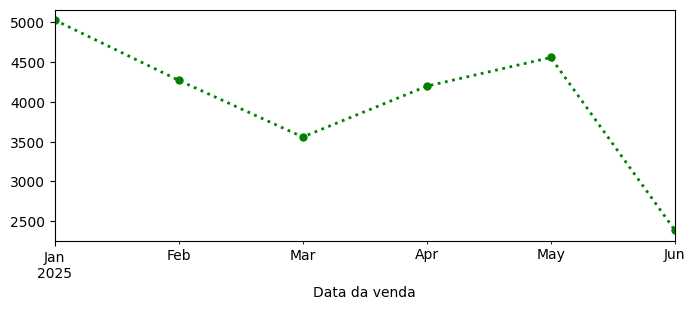

In [51]:
# Objetivo: Identificar padrões temporais (ex.: picos de venda, sazonalidade).
vendas_por_mes = df.groupby(df["Data da venda"].dt.to_period('M'))["Numero nota fiscal"].nunique()
vendas_por_mes.plot(kind='line', color="green", linestyle=':', marker='o', markersize=5, linewidth=2, figsize=(8,3))

<Axes: xlabel='Data da venda'>

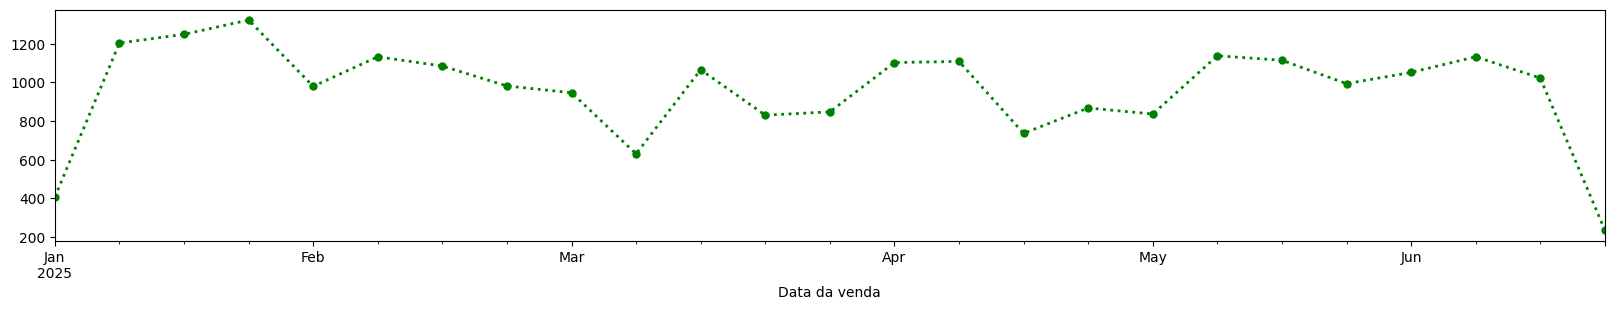

In [52]:
vendas_por_dias_semana = df.groupby(df["Data da venda"].dt.to_period('W'))["Numero nota fiscal"].nunique()
vendas_por_dias_semana.plot(kind='line', color="green", linestyle=':', marker='o', markersize=5, linewidth=2, figsize=(20,3))

#### Tamanho das Notas Fiscais (Itens por Nota)
##### Objetivo: Entender quantos produtos são comprados juntos (crucial para regras de associação).

In [53]:
itens_por_nota = df.groupby(df["Numero nota fiscal"])["Código produto"].count().describe()
itens_por_nota

count    24008.000000
mean         7.246876
std          8.091939
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        145.000000
Name: Código produto, dtype: float64

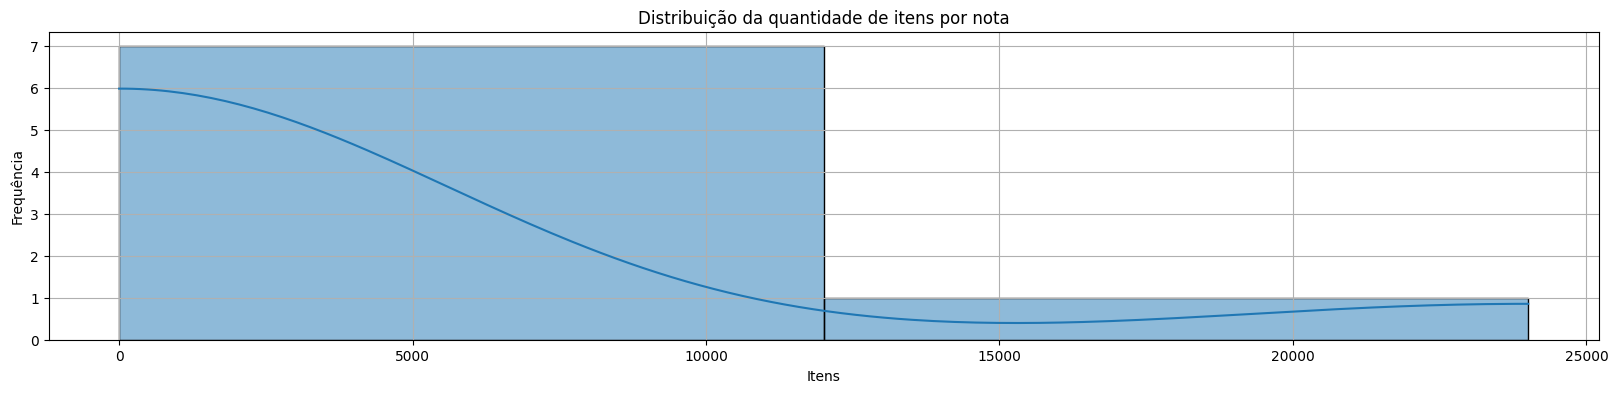

In [54]:
plt.figure(figsize=(20,4))
sns.histplot(itens_por_nota, bins=2, kde=True)
plt.title("Distribuição da quantidade de itens por nota")
plt.xlabel("Itens")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

<Axes: xlabel='Descrição do produto'>

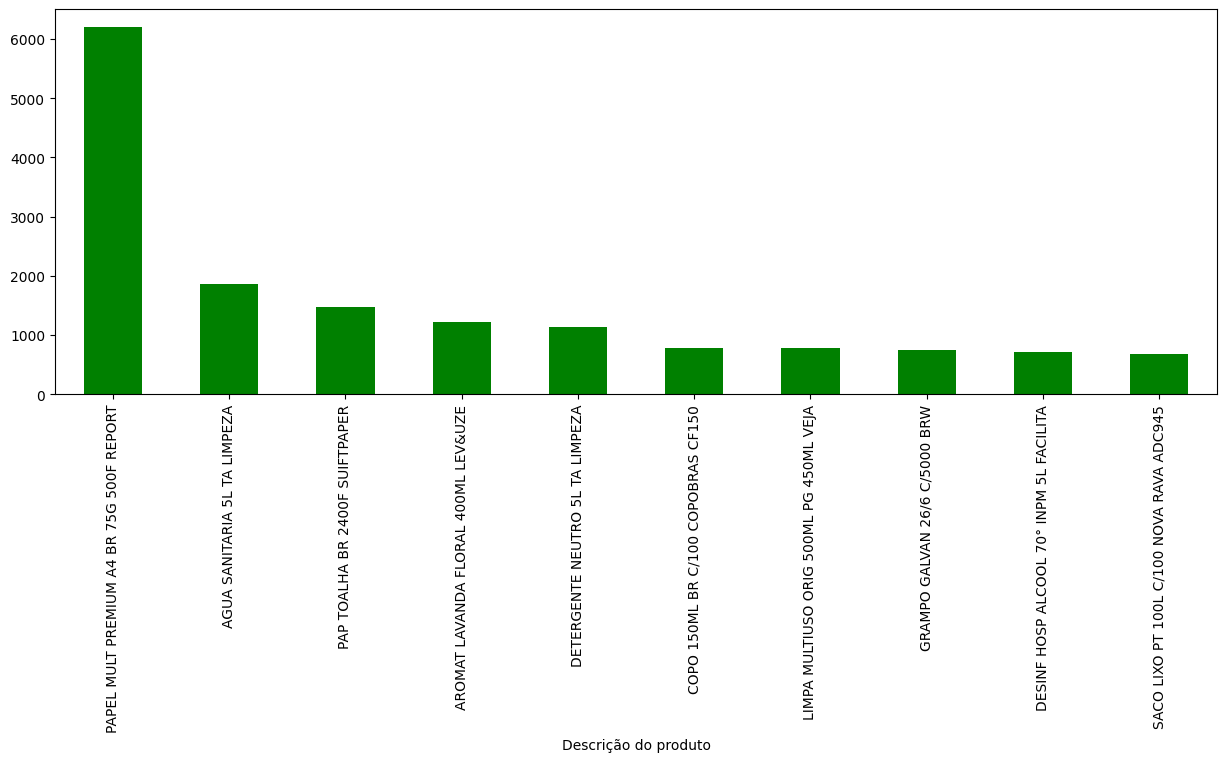

In [55]:
top_notas = df.groupby("Descrição do produto").size().sort_values(ascending=False).head(10)
top_notas.plot(kind='bar', color="green", figsize=(15, 5))

##### A presença de uma alta variância na quantidade de itens por nota (std = 8,09) pode impactar diretamente a qualidade e interpretabilidade do modelo de regras de associação (Apriori).

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

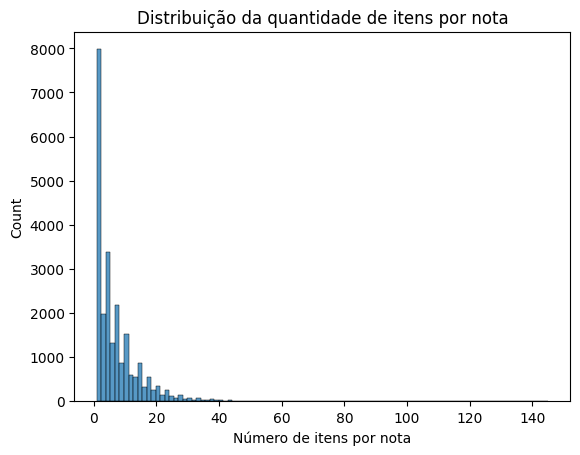

In [57]:
# distribuição dos tamanhos das notas
itens_nota = df.groupby("Numero nota fiscal")["Código produto"].count()
sns.histplot(itens_nota, bins=100)
plt.title("Distribuição da quantidade de itens por nota")
plt.xlabel("Número de itens por nota")
plt.show()


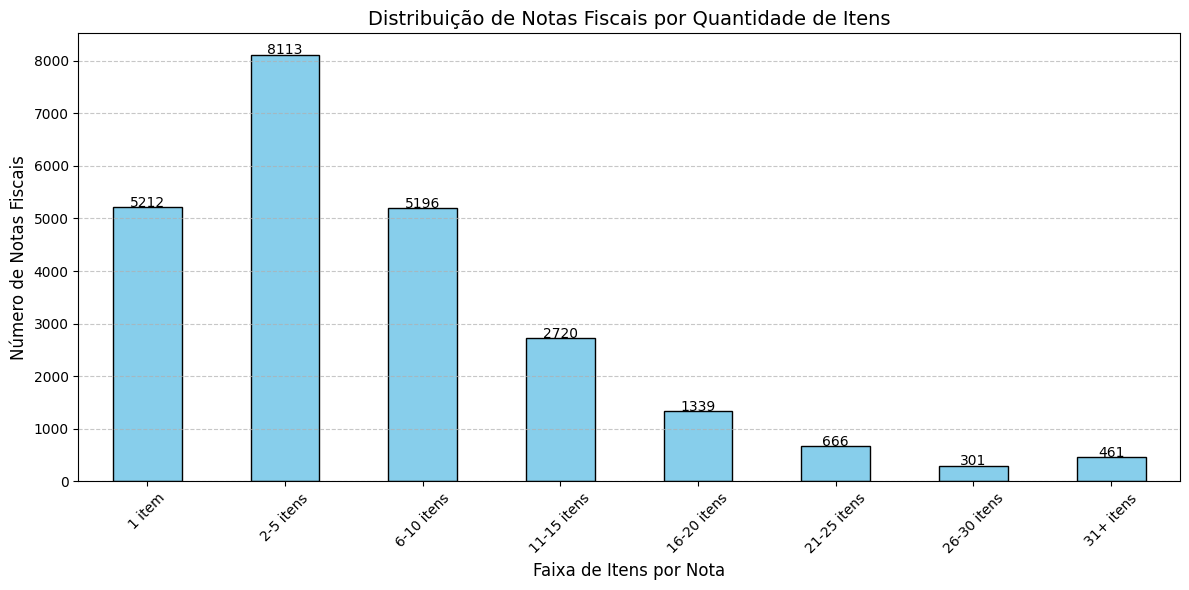


Distribuição Percentual:
Faixa
1 item         21.71%
2-5 itens      33.79%
6-10 itens     21.64%
11-15 itens    11.33%
16-20 itens     5.58%
21-25 itens     2.77%
26-30 itens     1.25%
31+ itens       1.92%
Name: count, dtype: object


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que seu DataFrame seja 'df'
# 1. Calcular a quantidade de itens por nota fiscal
itens_por_nota = df.groupby('Numero nota fiscal').size().reset_index(name='Quantidade Itens')

# 2. Definir as faixas de agrupamento
bins = [1, 2, 6, 11, 16, 21, 26, 31, float('inf')]
labels = ['1 item', '2-5 itens', '6-10 itens', '11-15 itens', '16-20 itens', '21-25 itens', '26-30 itens', '31+ itens']

# 3. Classificar cada nota em uma faixa
itens_por_nota['Faixa'] = pd.cut(itens_por_nota['Quantidade Itens'], bins=bins, labels=labels, right=False)

# 4. Contar notas por faixa
distribuicao = itens_por_nota['Faixa'].value_counts().sort_index()

# 5. Plotar gráfico de barras
plt.figure(figsize=(12, 6))
distribuicao.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Notas Fiscais por Quantidade de Itens', fontsize=14)
plt.xlabel('Faixa de Itens por Nota', fontsize=12)
plt.ylabel('Número de Notas Fiscais', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, valor in enumerate(distribuicao):
    plt.text(i, valor + 5, str(valor), ha='center')

plt.tight_layout()
plt.show()

# 6. Mostrar tabela com percentuais
distribuicao_perc = (distribuicao / len(itens_por_nota)) * 100
print("\nDistribuição Percentual:")
print(distribuicao_perc.round(2).astype(str) + '%')

   Percentil  Quantidade de Itens                            Interpretação
0          5                  2.0             5% das notas têm até 2 itens
1         10                  2.0            10% das notas têm até 2 itens
2         25                  3.0       25% das notas têm até 3 itens (Q1)
3         50                  6.0  50% das notas têm até 6 itens (Mediana)
4         75                 12.0      75% das notas têm até 12 itens (Q3)
5         90                 18.0           90% das notas têm até 18 itens
6         95                 24.0           95% das notas têm até 24 itens
7         99                 41.0           99% das notas têm até 41 itens


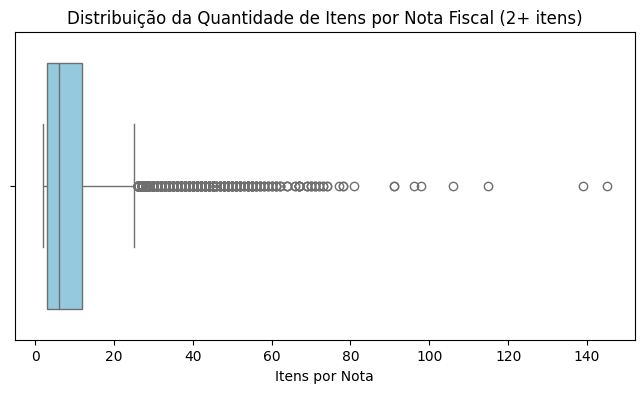

In [59]:
import pandas as pd
import numpy as np

# 1. Filtrar notas com 2+ itens
itens_por_nota = df.groupby('Numero nota fiscal').size()
itens_por_nota_filtrado = itens_por_nota[itens_por_nota >= 2]

# 2. Calcular percentis (personalizáveis)
percentis = [5, 10, 25, 50, 75, 90, 95, 99]
resultado = np.percentile(itens_por_nota_filtrado, percentis)

# 3. Criar tabela de análise
distribuicao_percentis = pd.DataFrame({
    'Percentil': percentis,
    'Quantidade de Itens': resultado,
    'Interpretação': [
        '5% das notas têm até X itens',
        '10% das notas têm até X itens',
        '25% das notas têm até X itens (Q1)',
        '50% das notas têm até X itens (Mediana)',
        '75% das notas têm até X itens (Q3)',
        '90% das notas têm até X itens',
        '95% das notas têm até X itens',
        '99% das notas têm até X itens'
    ]
})

# Substituir X pelos valores
distribuicao_percentis['Interpretação'] = distribuicao_percentis.apply(
    lambda row: row['Interpretação'].replace('X', str(int(row['Quantidade de Itens']))), axis=1
)

print(distribuicao_percentis)

# 4. Plotar boxplot para visualização
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(x=itens_por_nota_filtrado, color='skyblue')
plt.title('Distribuição da Quantidade de Itens por Nota Fiscal (2+ itens)')
plt.xlabel('Itens por Nota')
plt.show()

In [60]:
# 1. Filtrar notas com 2+ itens
notas_com_itens = df.groupby('Numero nota fiscal').filter(lambda x: len(x) >= 2)

# 2. Separar as bases
base_principal = notas_com_itens.groupby('Numero nota fiscal').filter(lambda x: len(x) <= 24)
base_grandes_notas = notas_com_itens.groupby('Numero nota fiscal').filter(lambda x: len(x) > 24)

# 3. Verificar estatísticas
print(f"Total de notas originais: {df['Numero nota fiscal'].nunique()}")
print(f"Notas com 2+ itens: {notas_com_itens['Numero nota fiscal'].nunique()}") 
print(f"Base principal (2-24 itens): {base_principal['Numero nota fiscal'].nunique()} notas")
print(f"Base grandes notas (25+ itens): {base_grandes_notas['Numero nota fiscal'].nunique()} notas")

# 4. Salvar as bases (opcional)
base_principal.to_csv('base_principal_2_a_24_itens.csv', index=False)
base_grandes_notas.to_csv('base_grandes_notas_25_mais_itens.csv', index=False)

Total de notas originais: 24008
Notas com 2+ itens: 18796
Base principal (2-24 itens): 17919 notas
Base grandes notas (25+ itens): 877 notas


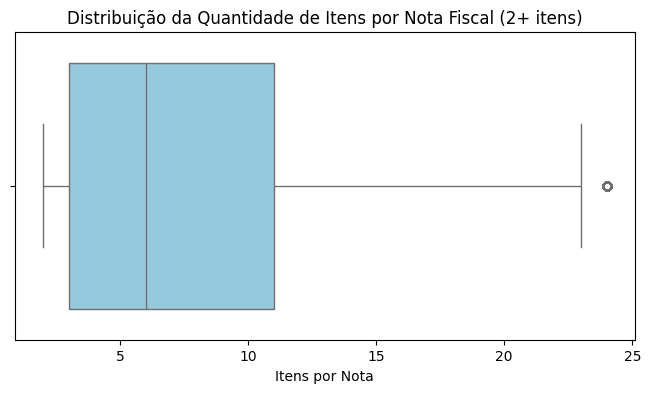

In [61]:
# 4. Plotar boxplot para visualização
import seaborn as sns

itens_por_notas = base_principal.groupby('Numero nota fiscal').size()

plt.figure(figsize=(8, 4))
sns.boxplot(x=itens_por_notas, color='skyblue')
plt.title('Distribuição da Quantidade de Itens por Nota Fiscal (2+ itens)')
plt.xlabel('Itens por Nota')
plt.show()

In [62]:
base_principal.columns.tolist()

['Numero nota fiscal',
 'Data da venda',
 'Código produto',
 'Descrição do produto',
 'Quantidade do produto',
 'Valor unitário',
 'Preço de custo',
 'Valor total produto',
 'Valor da nota',
 'Código da categoria',
 'Categoria',
 'Código da Marca',
 'Marca',
 'Quantidade estoque']

#### Para garantir que as colunas Código produto e Descrição do produto estejam realmente prontas para o modelo, verificar ainda:

In [63]:
# Produtos duplicados com códigos diferentes:
base_principal.groupby("Descrição do produto")["Código produto"].nunique().sort_values(ascending=False).head()

Descrição do produto
ABAFADOR CONCHA AZ DELTAPLUS SPA3           1
ABAFADOR RUIDO CONCHA COMBAT DELTAPLUS      1
ABELINHA CORDA ROYAL TOYS                   1
ABRACADEIR NYLON BR 2,5X100 C/100 FOXLUX    1
ABRACADEIR NYLON BR 3,5X140 C/100 FOXLUX    1
Name: Código produto, dtype: int64

In [64]:
# Códigos sem vendas ou sem estoque:
# Produtos únicos com estoque > 0
produtos_com_estoque = base_principal[base_principal['Quantidade estoque'] > 0]['Código produto'].unique()

# Produtos únicos que foram vendidos (aparecem em notas fiscais)
produtos_vendidos = df['Código produto'].unique()

# Produtos em estoque SEM vendas (usando sets para eficiência)
produtos_sem_venda = set(produtos_com_estoque) - set(produtos_vendidos)
num_produtos_sem_venda = len(produtos_sem_venda)

print(f"Produtos em estoque sem vendas: {num_produtos_sem_venda}")

Produtos em estoque sem vendas: 0


#### estatísticas descritivas da coluna Quantidade do produto, incluindo métricas como média, mediana, moda, desvio padrão e percentis:

In [65]:
base_principal["Quantidade do produto"].describe()

count    137610.000000
mean         13.451137
std          65.010006
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        9764.000000
Name: Quantidade do produto, dtype: float64

          Métrica    Valor
0           Média    13.45
1   Mediana (Q50)     4.00
2            Moda     1.00
3   Desvio Padrão    65.01
4          Mínimo     1.00
5             Q25     2.00
6             Q75    10.00
7             Q90    25.00
8             Q95    50.00
9             Q99   144.00
10         Máximo  9764.00


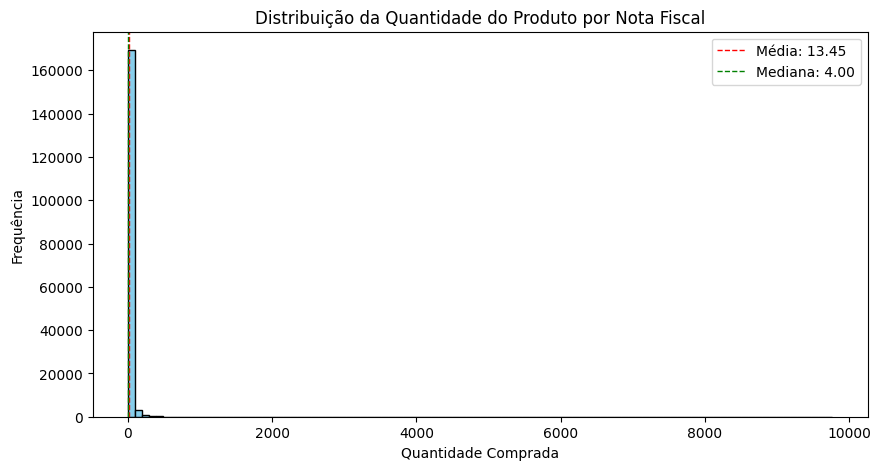

In [66]:
# Estatísticas descritivas básicas
descricao = base_principal['Quantidade do produto'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

# Adicionar a moda (que não está incluída no describe)
moda = base_principal['Quantidade do produto'].mode().values[0]

# Criar um DataFrame com todas as estatísticas
estatisticas = pd.DataFrame({
    'Métrica': ['Média', 'Mediana (Q50)', 'Moda', 'Desvio Padrão', 'Mínimo', 'Q25', 'Q75', 'Q90', 'Q95', 'Q99', 'Máximo'],
    'Valor': [
        descricao['mean'],
        descricao['50%'],
        moda,
        descricao['std'],
        descricao['min'],
        descricao['25%'],
        descricao['75%'],
        descricao['90%'],
        descricao['95%'],
        descricao['99%'],
        descricao['max']
    ]
})

# Arredondar valores para 2 casas decimais
estatisticas['Valor'] = estatisticas['Valor'].round(2)

print(estatisticas)

# Opcional: Histograma para visualizar a distribuição
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(df['Quantidade do produto'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribuição da Quantidade do Produto por Nota Fiscal')
plt.xlabel('Quantidade Comprada')
plt.ylabel('Frequência')
plt.axvline(descricao['mean'], color='red', linestyle='dashed', linewidth=1, label=f'Média: {descricao["mean"]:.2f}')
plt.axvline(descricao['50%'], color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {descricao["50%"]:.2f}')
plt.legend()
plt.show()

c:\Users\Paulo Neto\Desktop\recomenda\venv\Lib\site-packages\matplotlib\axes\_axes.py:7165: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


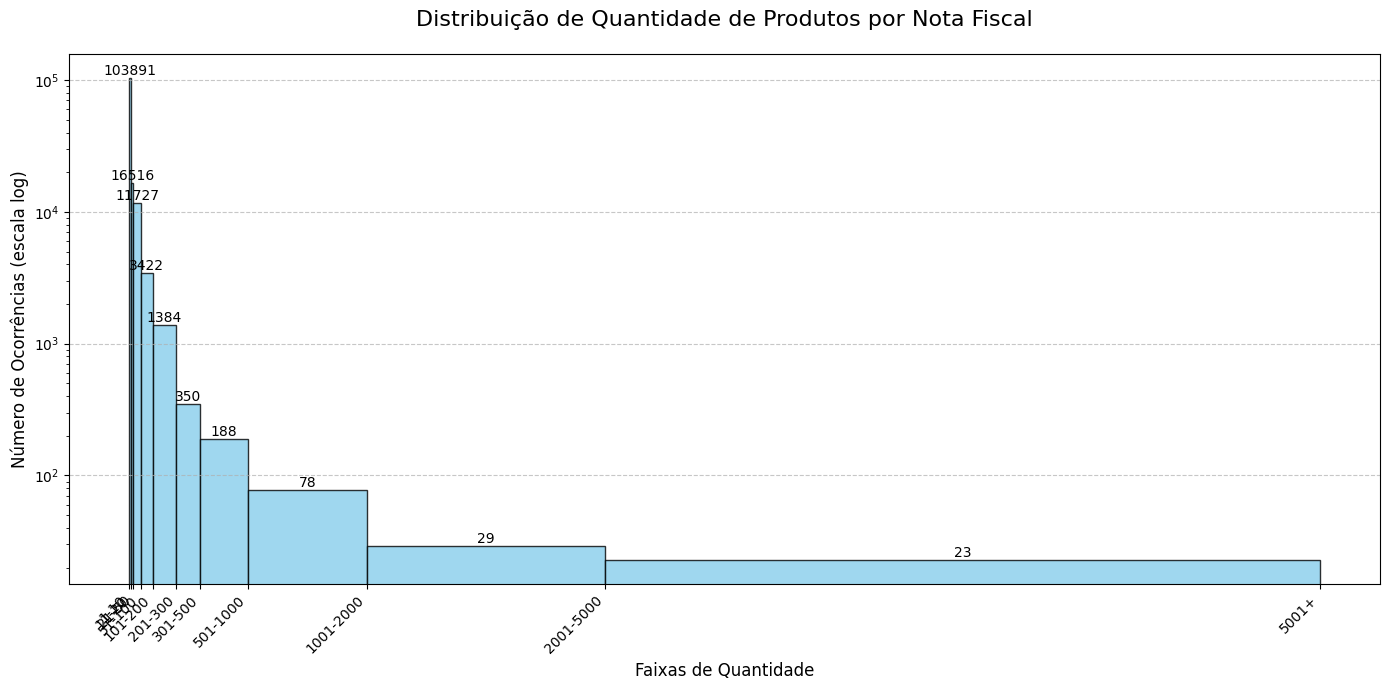

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Definir os bins personalizados conforme sua solicitação
bins = [1, 11, 21, 51, 101, 201, 301, 501, 1001, 2001, 5001, np.inf]
labels = ['1-10', '11-20', '21-50', '51-100', 
          '101-200', '201-300', '301-500', '501-1000', '1001-2000', '2001-5000', '5001+']

# Criar o histograma
plt.figure(figsize=(14, 7))
n, bins, patches = plt.hist(base_principal['Quantidade do produto'], 
                           bins=bins, 
                           color='skyblue', 
                           edgecolor='black', 
                           alpha=0.8)

# Personalizar eixos e título
plt.title('Distribuição de Quantidade de Produtos por Nota Fiscal', fontsize=16, pad=20)
plt.xlabel('Faixas de Quantidade', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(bins[:-1], labels, rotation=45, ha='right')

# Adicionar valores em cima de cada barra
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, 
             patches[i].get_height(), 
             f'{int(n[i])}', 
             ha='center', 
             va='bottom')

# Ajustar escala do eixo Y (logarítmica se houver grande variação)
if n.max() / n.min() > 100:
    plt.yscale('log')
    plt.ylabel('Número de Ocorrências (escala log)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
import pandas as pd

# Definir os bins e labels
bins = [1, 6, 11, 16, 21, 26, 31, 51, 101, 201, 301, 501, 1001, 2001, 5001, float('inf')]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-50', '51-100', 
          '101-200', '201-300', '301-500', '501-1000', '1001-2000', '2001-5000', '5001+']

# Calcular a distribuição
distribuicao = pd.cut(base_principal['Quantidade do produto'], bins=bins, labels=labels).value_counts().sort_index()
distribuicao_perc = (distribuicao / len(base_principal) * 100).round(2)

# Criar um DataFrame formatado para exibição
resultado = pd.DataFrame({
    'Faixa de Quantidade': labels,
    'Ocorrências': distribuicao.values,
    'Porcentagem (%)': distribuicao_perc.values
})

# Adicionar porcentagem acumulada
resultado['Porcentagem Acumulada (%)'] = resultado['Porcentagem (%)'].cumsum().round(2)

# Estilizar a tabela
def color_highlights(s):
    return ['background-color: #e6f3ff' if s.name == s.idxmax() else '' for _ in s]

display(resultado.style
        .apply(color_highlights, subset=['Porcentagem (%)'])
        .format({'Porcentagem (%)': '{:.2f}%', 'Porcentagem Acumulada (%)': '{:.2f}%'})
        .set_caption('Distribuição Percentual das Quantidades por Nota Fiscal'))

,Faixa de Quantidade,Ocorrências,Porcentagem (%),Porcentagem Acumulada (%)
0,1-5,55698,40.48%,40.48%
1,6-10,14947,10.86%,51.34%
2,11-15,10947,7.96%,59.30%
3,16-20,5423,3.94%,63.24%
4,21-25,4467,3.25%,66.49%
5,26-30,2045,1.49%,67.98%
6,31-50,5169,3.76%,71.74%
7,51-100,3418,2.48%,74.22%
8,101-200,1383,1.01%,75.23%
9,201-300,350,0.25%,75.48%


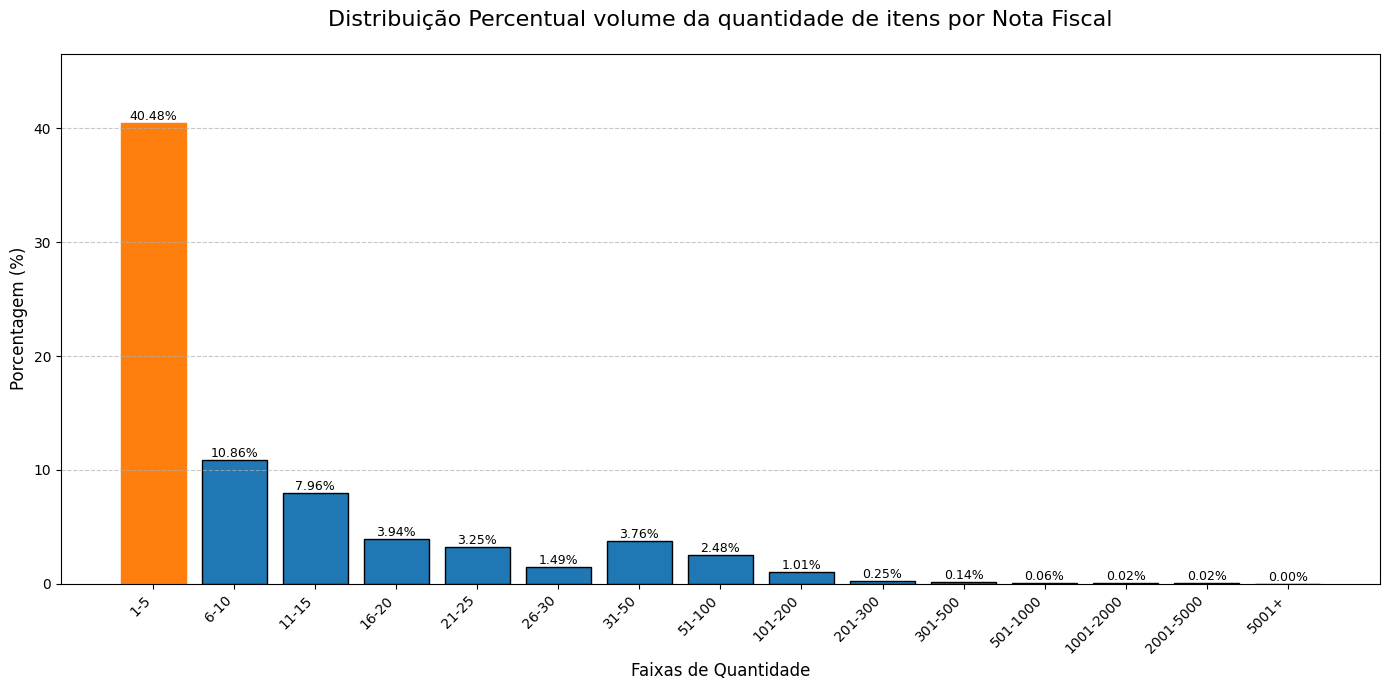

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Seus dados
data = {
    'Faixa de Quantidade': ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-50', 
                          '51-100', '101-200', '201-300', '301-500', '501-1000', 
                          '1001-2000', '2001-5000', '5001+'],
    'Porcentagem (%)': [40.48, 10.86, 7.96, 3.94, 3.25, 1.49, 3.76, 2.48, 1.01, 
                       0.25, 0.14, 0.06, 0.02, 0.02, 0.00]
}

# Configurações do gráfico
plt.figure(figsize=(14, 7))
bars = plt.bar(resultado['Faixa de Quantidade'], resultado['Porcentagem (%)'], 
               color='#1f77b4', edgecolor='black', width=0.8)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=9)

# Personalização
plt.title('Distribuição Percentual volume da quantidade de itens por Nota Fiscal', fontsize=16, pad=20)
plt.xlabel('Faixas de Quantidade', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Destacar a barra dominante
bars[0].set_color('#ff7f0e')  # Laranja para a faixa 1-5

# Ajustar limites do eixo Y
plt.ylim(0, max(data['Porcentagem (%)']) * 1.15)

plt.tight_layout()
plt.show()

In [70]:
base_principal["Valor unitário"].describe()

count    137610.000000
mean         16.795839
std          26.311269
min           0.190000
25%           4.200000
50%           8.930000
75%          19.807500
max         875.890000
Name: Valor unitário, dtype: float64

In [71]:
base_principal["Valor unitário"].quantile([0.05, 0.25, 0.5, 0.75, 0.95, 0.90, 0.99])


0.05      1.5500
0.25      4.2000
0.50      8.9300
0.75     19.8075
0.95     56.6400
0.90     37.1110
0.99    115.8964
Name: Valor unitário, dtype: float64

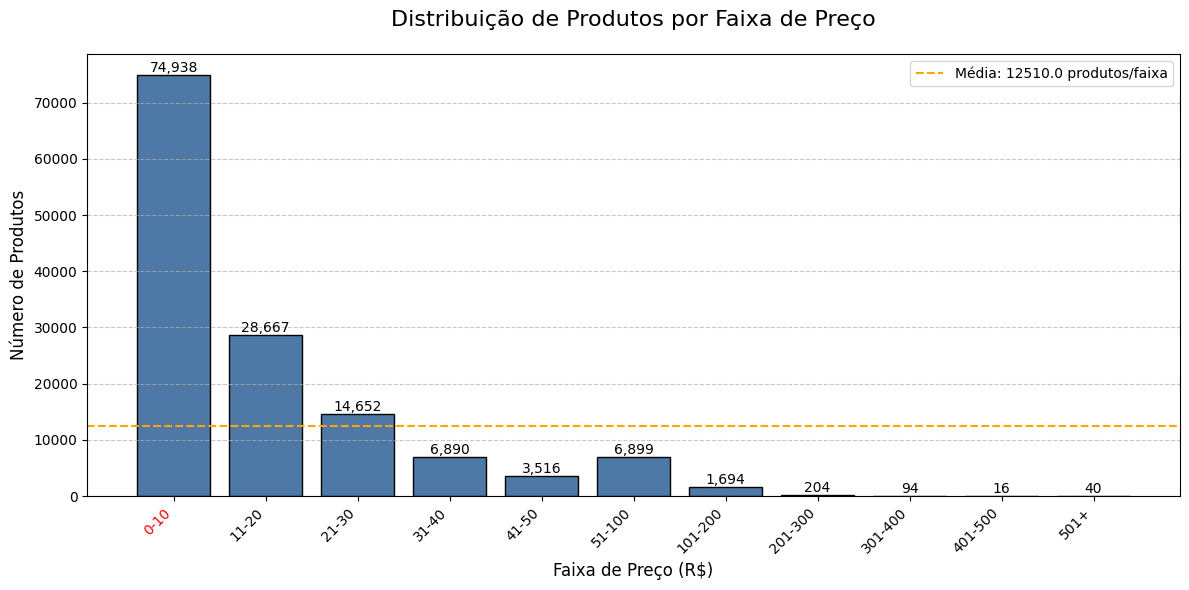


🔍 Análise:
- Faixa dominante: '0-10' (concentra 54.5% dos produtos)
- Produtos com preço > R$500: 34 itens (potenciais outliers)
- Faixas com menos de 1% dos produtos: ['201-300', '301-400', '401-500', '501+']


In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Definir as faixas de preço
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-200', 
          '201-300', '301-400', '401-500', '501+']

# Criar a coluna de faixas
base_principal['Faixa de Preço'] = pd.cut(base_principal['Valor unitário'], bins=bins, labels=labels)

# Contar produtos por faixa
contagem = base_principal['Faixa de Preço'].value_counts().sort_index()

# Plotar o histograma
plt.figure(figsize=(12, 6))
bars = plt.bar(contagem.index, contagem.values, color='#4e79a7', edgecolor='black')

# Adicionar rótulos e títulos
plt.title('Distribuição de Produtos por Faixa de Preço', fontsize=16, pad=20)
plt.xlabel('Faixa de Preço (R$)', fontsize=12)
plt.ylabel('Número de Produtos', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Destacar a faixa dominante
dominante = contagem.idxmax()
plt.gca().get_xticklabels()[contagem.index.get_loc(dominante)].set_color('red')

# Linha de média
plt.axhline(y=contagem.mean(), color='orange', linestyle='--', 
            label=f'Média: {contagem.mean():.1f} produtos/faixa')
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise textual
dominante_pct = (contagem.max() / contagem.sum()) * 100
outliers = base_principal[base_principal['Valor unitário'] > 500]['Valor unitário'].nunique()

print(f"\n🔍 Análise:")
print(f"- Faixa dominante: '{dominante}' (concentra {dominante_pct:.1f}% dos produtos)")
print(f"- Produtos com preço > R$500: {outliers} itens (potenciais outliers)")
print(f"- Faixas com menos de 1% dos produtos: {list(contagem[contagem/contagem.sum() < 0.01].index)}")

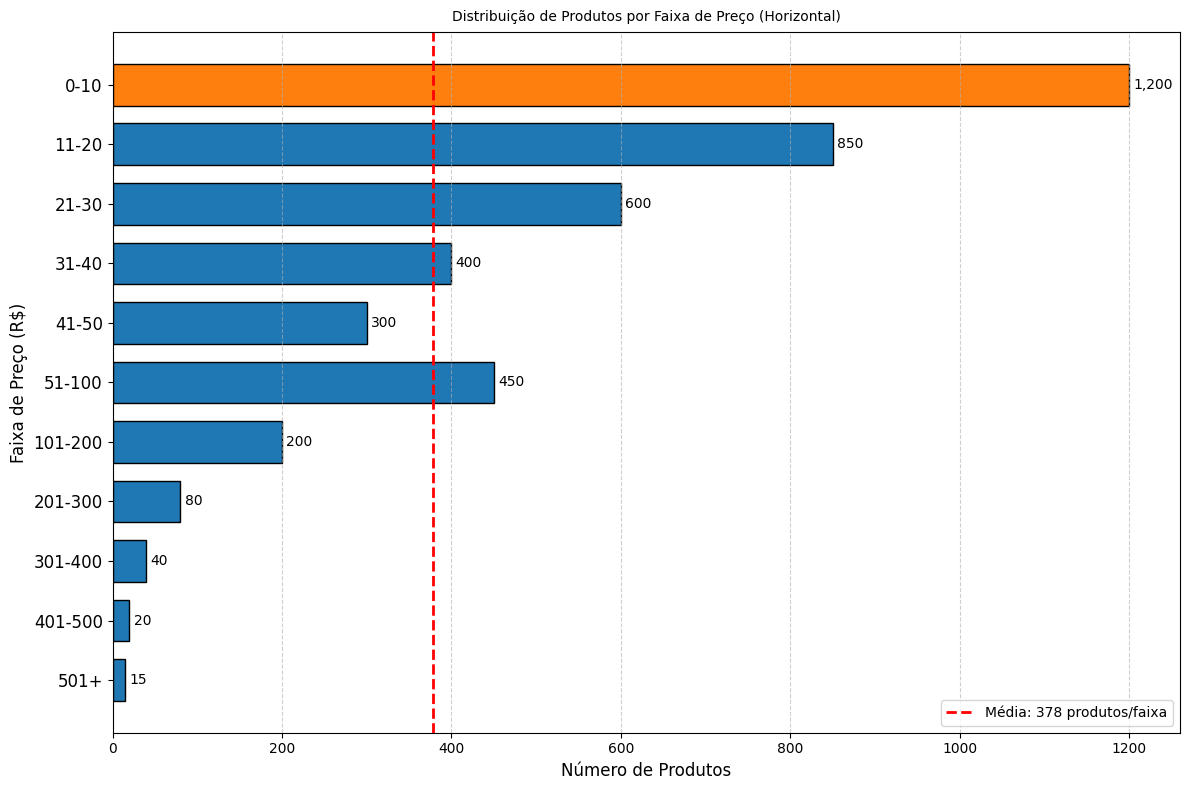


📊 Análise Completa:
- Faixa com mais produtos: '0-10' (1,200 produtos)
- Média geral de preço: R$16.80
- Faixas com menos de 1% do total: ['301-400', '401-500', '501+']


In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Configurações do gráfico
plt.figure(figsize=(12, 8))

# Dados (substitua pelos seus dados reais)
faixas = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', 
          '101-200', '201-300', '301-400', '401-500', '501+']
quantidades = [1200, 850, 600, 400, 300, 450, 200, 80, 40, 20, 15]  # Exemplo

# Cores personalizadas
cores = ['#1f77b4'] * len(faixas)
cores[0] = '#ff7f0e'  # Destaque para a faixa dominante

# Gráfico de barras horizontais
bars = plt.barh(faixas, quantidades, color=cores, edgecolor='black', height=0.7)

# Linha da média
media_preco = base_principal['Valor unitário'].mean()  # Calcula a média real dos preços
plt.axvline(x=np.mean(quantidades), color='red', linestyle='--', linewidth=2, 
            label=f'Média: {np.mean(quantidades):.0f} produtos/faixa')

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{width:,}', 
             va='center', ha='left', fontsize=10)

# Configurações do eixo Y
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Inverter para mostrar a faixa mais alta no topo

# Títulos e legendas
plt.title('Distribuição de Produtos por Faixa de Preço (Horizontal)', fontsize=10, pad=8)
plt.xlabel('Número de Produtos', fontsize=12)
plt.ylabel('Faixa de Preço (R$)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustar layout
plt.tight_layout()
plt.show()

# Análise complementar
print(f"\n📊 Análise Completa:")
print(f"- Faixa com mais produtos: '{faixas[np.argmax(quantidades)]}' ({max(quantidades):,} produtos)")
print(f"- Média geral de preço: R${media_preco:.2f}")
print(f"- Faixas com menos de 1% do total: {[f for f, q in zip(faixas, quantidades) if q/sum(quantidades) < 0.01]}")

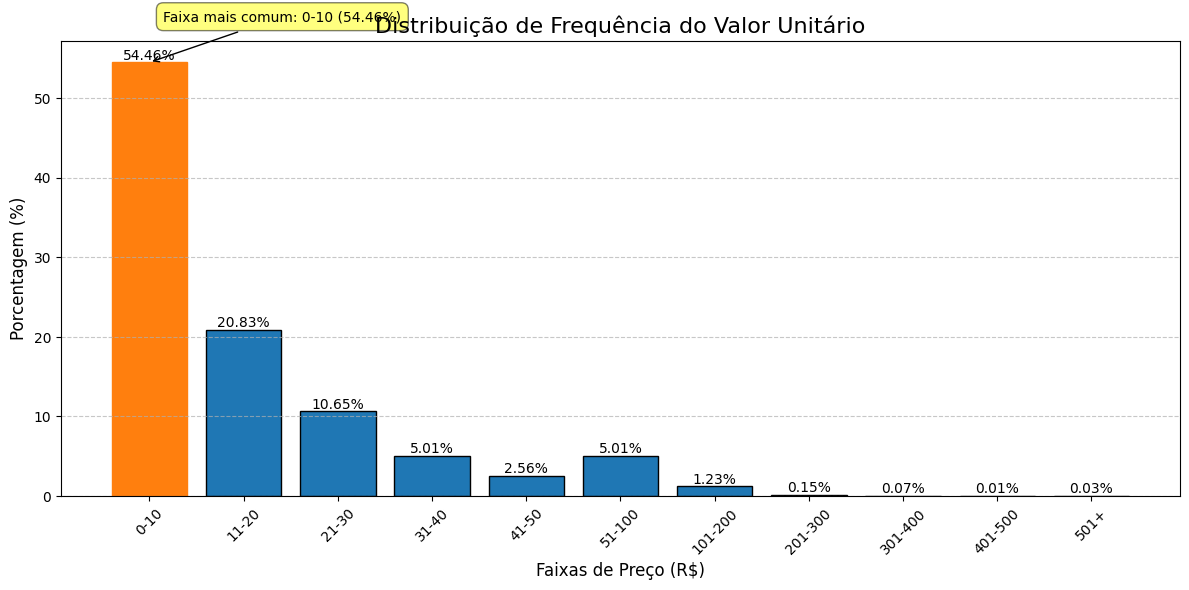


A faixa de preço mais comum é '0-10', concentrando 54.46% dos produtos.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir as faixas de preço
bins = [0, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, np.inf]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501+']

# Criar a distribuição
distribuicao = pd.cut(base_principal['Valor unitário'], bins=bins, labels=labels).value_counts().sort_index()
distribuicao_perc = (distribuicao / len(base_principal) * 100).round(2)

# Identificar a faixa mais frequente
faixa_mais_comum = distribuicao.idxmax()
percentual_mais_comum = distribuicao_perc.max()

# Configurar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(distribuicao.index, distribuicao_perc, color='#1f77b4', edgecolor='black')

# Destacar a barra mais alta
bars[distribuicao.index.get_loc(faixa_mais_comum)].set_color('#ff7f0e')

# Adicionar rótulos de porcentagem
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height}%',
             ha='center', va='bottom')

# Personalização
plt.title('Distribuição de Frequência do Valor Unitário', fontsize=16)
plt.xlabel('Faixas de Preço (R$)', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anotação da faixa dominante
plt.annotate(f'Faixa mais comum: {faixa_mais_comum} ({percentual_mais_comum}%)',
             xy=(faixa_mais_comum, percentual_mais_comum),
             xytext=(10, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'),
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# Resultado numérico
print(f"\nA faixa de preço mais comum é '{faixa_mais_comum}', concentrando {percentual_mais_comum}% dos produtos.")

In [81]:
# Número total de categorias distintas
num_categorias = base_principal['Categoria'].nunique()
print(f"Número de categorias únicas: {num_categorias}")

Número de categorias únicas: 370


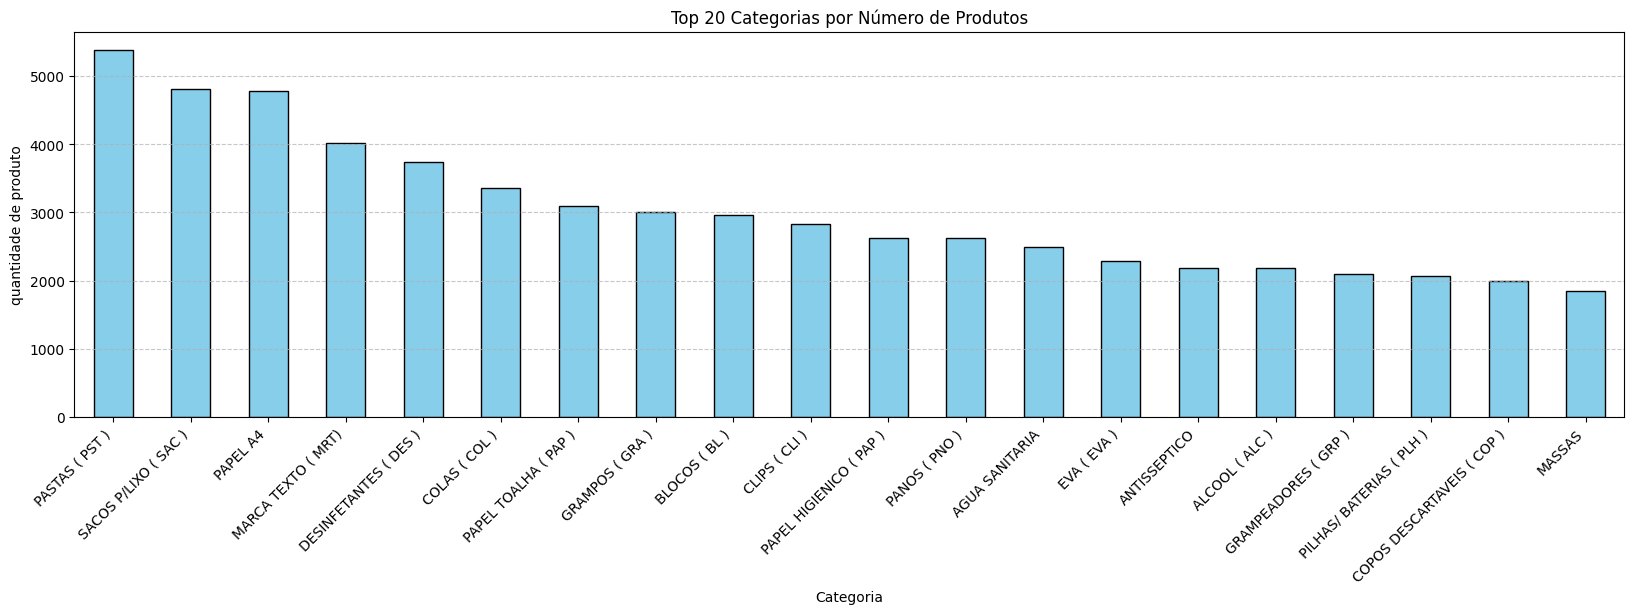


Distribuição percentual:
Categoria
PASTAS ( PST )                3.91
SACOS P/LIXO ( SAC )          3.49
PAPEL A4                      3.47
MARCA TEXTO ( MRT)            2.91
DESINFETANTES ( DES )         2.72
COLAS ( COL )                 2.44
PAPEL TOALHA ( PAP )          2.25
GRAMPOS ( GRA )               2.19
BLOCOS ( BL )                 2.15
CLIPS ( CLI )                 2.05
PAPEL HIGIENICO ( PAP )       1.91
PANOS ( PNO )                 1.91
AGUA SANITARIA                1.81
EVA ( EVA )                   1.66
ANTISSEPTICO                  1.59
ALCOOL ( ALC )                1.59
GRAMPEADORES ( GRP )          1.52
PILHAS/ BATERIAS ( PLH )      1.51
COPOS DESCARTAVEIS ( COP )    1.45
MASSAS                        1.34
Name: proportion, dtype: float64


In [111]:
import matplotlib.pyplot as plt

# Contagem de produtos por categoria (top 10)
top_categorias = base_principal['Categoria'].value_counts().head(20)

# Gráfico de barras
plt.figure(figsize=(20, 5))
top_categorias.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Categorias por Número de Produtos')
plt.xlabel('Categoria')
plt.ylabel('quantidade de produto')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tabela com porcentagens
distribuicao_perc = (base_principal['Categoria'].value_counts(normalize=True) * 100).round(2)
print("\nDistribuição percentual:")
print(distribuicao_perc.head(20))

<Axes: title={'center': 'Distribuição das Top 20 Categorias %'}>

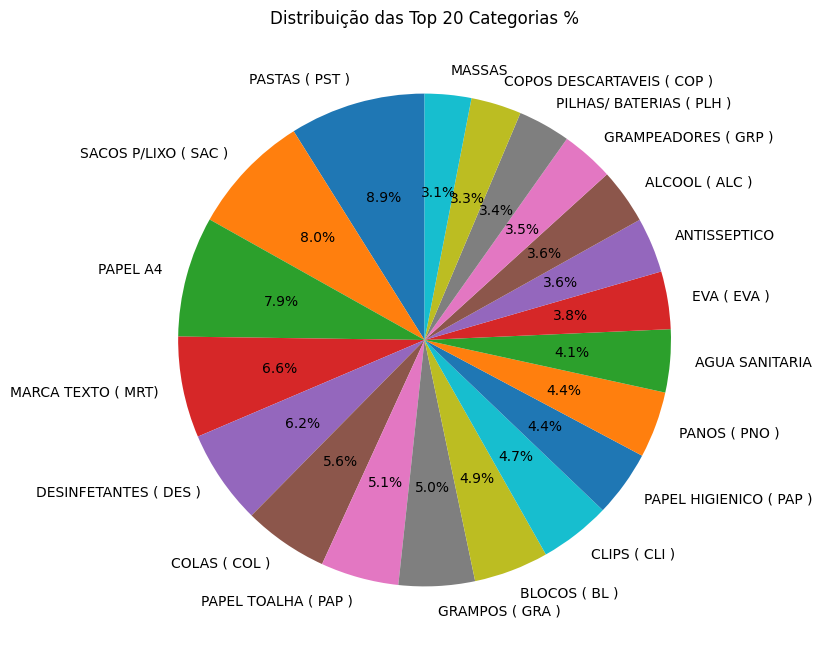

In [ ]:
distribuicao_perc.head(20).plot(
    kind='pie',
    figsize=(10, 8),
    title='Distribuição das Top 20 Categorias %',
    autopct='%1.1f%%',  # <- mostra os valores percentuais com uma casa decimal
    startangle=0,      # opcional: gira o gráfico para começar do topo
    legend=False,       # evita legenda duplicada
    ylabel=''           # remove o rótulo do eixo y (estético)
)


In [115]:
# Categorias com menos de X produtos (ex.: 5)
categorias_raras = base_principal['Categoria'].value_counts()[df['Categoria'].value_counts() < 3]
print("\nCategorias com poucos produtos:")
print(categorias_raras.head(10))


Categorias com poucos produtos:
Categoria
BANHEIRAS ( BAN )       2
LANCHEIRA               2
AMASSADOR ( AMS )       2
REGADOR                 2
LIMPA CONTATO           2
PRANCHA                 2
CINTA                   2
MEMORIA                 2
PROTETIVO RADIADOR      2
CHA DIVERSOS ( CHA )    2
Name: count, dtype: int64


In [116]:
# Média de estoque por categoria
estoque_por_categoria = base_principal.groupby('Categoria')['Quantidade estoque'].mean().sort_values(ascending=False)
print("\nMédia de estoque por categoria:")
print(estoque_por_categoria.head(10))


Média de estoque por categoria:
Categoria
PAPEL A4                83110.232928
ESPUMA CARNAVAL         11961.000000
PALHA DE AÇO ( PLH )     8008.181818
ESPONJAS ( EPJ )         7474.244878
GUARDANAPOS ( GDP )      6604.828110
LAPIS COR ( LC )         5244.358103
APAGADORES ( APG )       4681.561983
DISPLAY ( DIS )          4361.449612
EXTRATORES ( EXT )       4013.307190
LUVAS ( LUV )            3708.000000
Name: Quantidade estoque, dtype: float64


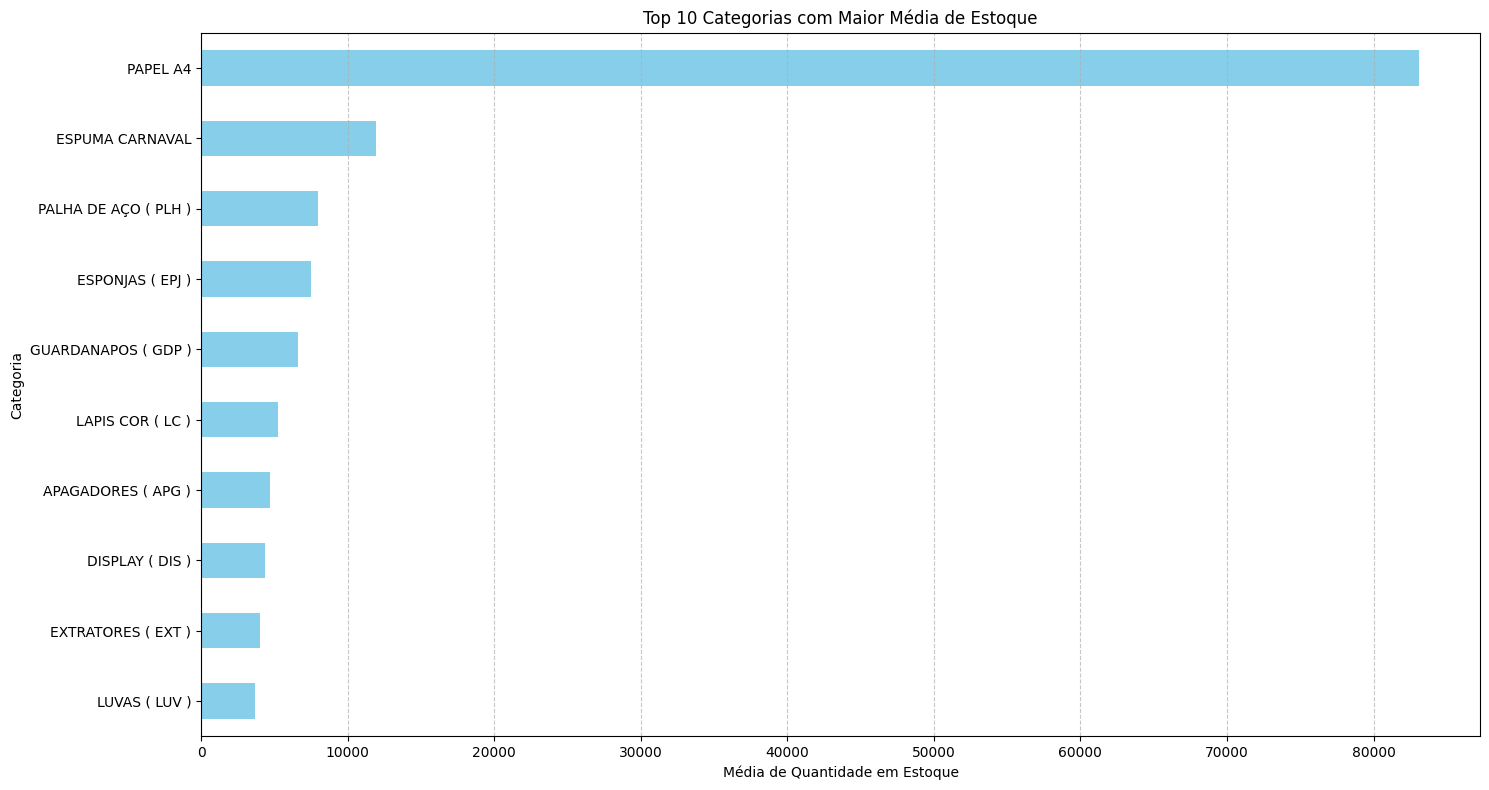

In [121]:
import matplotlib.pyplot as plt

# Seleciona apenas o top 10
top_estoque = estoque_por_categoria.head(10)

plt.figure(figsize=(15, 8))
top_estoque.plot(kind='barh', color='skyblue')  # gráfico de barras horizontais

plt.title('Top 10 Categorias com Maior Média de Estoque')
plt.xlabel('Média de Quantidade em Estoque')
plt.ylabel('Categoria')
plt.gca().invert_yaxis()  # Coloca a maior categoria no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [102]:
# Verificar categorias sem produtos (se houver dados faltantes)
if base_principal['Categoria'].isnull().sum() > 0:
    print(f"\nCategorias vazias: {base_principal['Categoria'].isnull().sum()} registros")
    print(base_principal[base_principal['Categoria'].isnull()].head())

In [103]:
# Número total de marcas distintas
num_marcas = base_principal['Marca'].nunique()
print(f"Número total de marcas únicas: {num_marcas}")

# Listar as primeiras 10 marcas (para inspeção)
print("\nExemplo de marcas registradas:")
print(base_principal['Marca'].unique()[:10])

Número total de marcas únicas: 299

Exemplo de marcas registradas:
['FILIPERSON NACIONAL REFL IND COMÉRCIO DE PAP ESPECIAIS S/A'
 'SANTHER FABRICA DE PAPEL SANTA THEREZINHA S/A'
 'FRAMA INDUSTRIA GRAFICA LTDA'
 'GRUPO MASTER COMERCIO IMPORTACAO E EXPORTACAO LTDA' 'BRASCOLA LTDA'
 'BRW SUPRIMENTOS ESCOLARES E ESCRITORIO LTDA.'
 'SAINT-GOBAIN DO BRASIL PRODUTOS IND. E P/ CONSTRUCAO LTDA' 'MERCUR SA'
 'SUZANO PAPEL E CELULOSE SA' 'RVM PAPER IMPORTACAO E ESPORTACAO EIRELI']


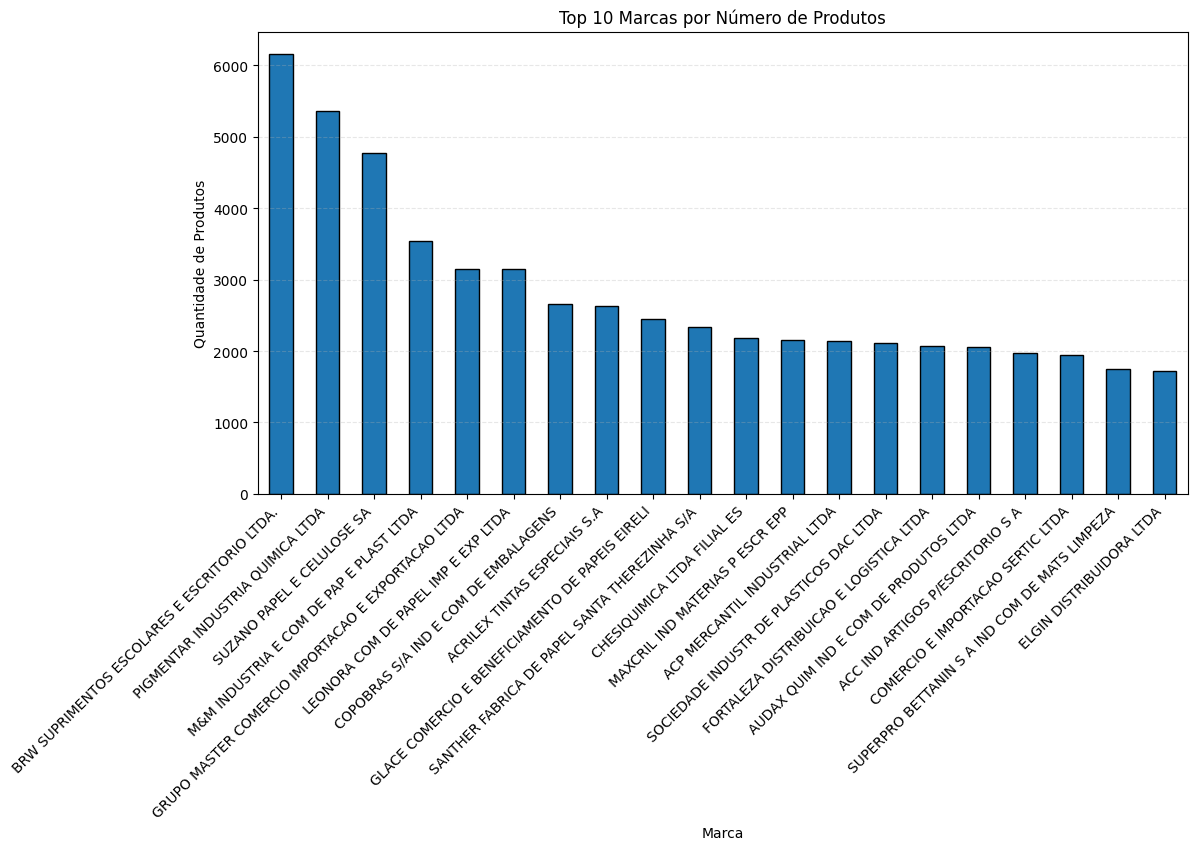


Distribuição percentual das marcas mais frequentes:
Marca
BRW SUPRIMENTOS ESCOLARES E ESCRITORIO LTDA.          4.48
PIGMENTAR INDUSTRIA QUIMICA LTDA                      3.90
SUZANO PAPEL E CELULOSE SA                            3.47
M&M INDUSTRIA E COM DE PAP E PLAST LTDA               2.57
GRUPO MASTER COMERCIO IMPORTACAO E EXPORTACAO LTDA    2.29
LEONORA COM DE PAPEL IMP E EXP LTDA                   2.29
COPOBRAS S/A IND E COM DE EMBALAGENS                  1.93
ACRILEX TINTAS ESPECIAIS S.A                          1.91
GLACE COMERCIO E BENEFICIAMENTO DE PAPEIS EIRELI      1.78
SANTHER FABRICA DE PAPEL SANTA THEREZINHA S/A         1.70
CHESIQUIMICA LTDA FILIAL ES                           1.59
MAXCRIL IND MATERIAS P ESCR EPP                       1.57
ACP MERCANTIL INDUSTRIAL LTDA                         1.55
SOCIEDADE INDUSTR DE PLASTICOS DAC LTDA               1.53
FORTALEZA DISTRIBUICAO E LOGISTICA LTDA               1.50
AUDAX QUIM IND E COM DE PRODUTOS LTDA                 1.

In [106]:
import matplotlib.pyplot as plt

# Contagem de produtos por marca (Top 10)
top_marcas = base_principal['Marca'].value_counts().head(20)

# Gráfico de barras
plt.figure(figsize=(12, 6))
top_marcas.plot(kind='bar', color='#1f77b4', edgecolor='black')
plt.title('Top 10 Marcas por Número de Produtos')
plt.xlabel('Marca')
plt.ylabel('Quantidade de Produtos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Tabela com porcentagens
distribuicao_marcas = (base_principal['Marca'].value_counts(normalize=True) * 100).round(2)
print("\nDistribuição percentual das marcas mais frequentes:")
print(distribuicao_marcas.head(20))

In [ ]:

distribuicao_marcas.head(20).plot(
    kind='pie',
    figsize=(10,8),
    title="Distribuição das Top 20 Categorias % ",
    
)

In [108]:
# Marcas com menos de X produtos (ex.: 5)
marcas_raras = base_principal['Marca'].value_counts()[base_principal['Marca'].value_counts() < 2]
print(f"\nMarcas com menos de 5 produtos (total: {len(marcas_raras)}):")
print(marcas_raras)


Marcas com menos de 5 produtos (total: 14):
Marca
PRATOS DESKART IND. E COM LTDA                                 1
REIPEL - RECICL E IND DE PAPEIS ESP LTDA                       1
BRILHAR COMERCIO VAREJISTA DE PRODUTOS DE LIMPEZA LTDA - ME    1
SAMBA TOYS - INDUSTRIA, DISTRIBUIDORA E IMPORTADORA LTDA       1
A I G COMERCIAL LTDA - EPP                                     1
MARIA GENI DISTRIB. DE ART. DE PAP. LTDA                       1
MARAL INDUSTRIA E COMERCIO DE BRINQUEDOS LTDA                  1
RAINHA IND E COM DE PLASTICOS LTDA                             1
HELIANA SANTIAGO MOREIRA                                       1
BRASBAR EMBALAGENS DESC DO BRASIL LTDA                         1
BETTANIN INDUSTRIAL S A                                        1
PLESTIN PLASTICOS ESTAMPADOS IND LTDA                          1
DON COM CLASSE                                                 1
INDUSTRIA BRASILEIRA DE BALOES LTDA.                           1
Name: count, dtype: int64


In [109]:
# Verificar marcas com estoque > 0 mas sem vendas
if 'Quantidade estoque' in base_principal.columns:
    marcas_sem_venda = base_principal[base_principal['Quantidade estoque'] > 0]['Marca'].unique()
    marcas_com_venda = base_principal['Marca'].unique()
    marcas_nao_vendidas = set(marcas_sem_venda) - set(marcas_com_venda)
    print(f"\nMarcas com estoque mas sem vendas: {len(marcas_nao_vendidas)}")


Marcas com estoque mas sem vendas: 0
